In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression


sys.path.append("./common/")

import matinfmod 

fname = "./FENAD_gen_1/PEAFE/newadata.pkl"

df = pd.read_pickle(fname)

FileNotFoundError: [Errno 2] No such file or directory: './FENAD_gen_1/PEAFE/newadata.pkl'

In [20]:
x = df["(EA_B - sqrt(fabs(IP_C)))/(exp(rs_A))"].values

data = pd.read_csv("./data/FENAD.csv")
y = data["PE-AFE"].values
labels = data["Name"]

print(y.shape, x.shape)

regressor = LinearRegression()
regressor.fit(x.reshape(-1,1), y)

y_pred = regressor.predict(x.reshape(-1,1))

print('Coefficients: \n', regressor.coef_)
print('Intecept: \n', regressor.intercept_)


(133,) (133,)
Coefficients: 
 [-0.17367082]
Intecept: 
 0.13660606183129503


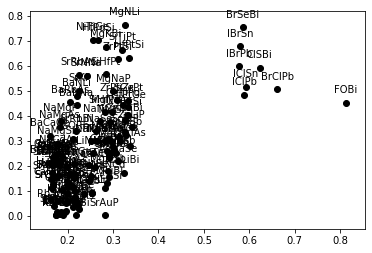

In [21]:
#plt.scatter(x, y,  color='black')
#plt.plot(x, y_pred, color='blue', linewidth=3)


plt.scatter(y_pred, y,  color='black')

i = 0
for x,y in zip(y_pred,y):
    label = labels[i]

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

    i += 1

#plt.xticks(())
#plt.yticks(())

plt.show()